In [6]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# warning of chained assignments is switched off 
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 50)


In [8]:
df = pd.read_csv('football_transfers_2021.csv' ,skip_blank_lines=True)

In [9]:
df

,player_name,position,age,team_origin,country_origin,league_origin,team_dest,country_dest,league_dest,transfer_fee,date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65484,Alexander Hjaelmhof,Central Midfield,20.0,San Diego State,United States,United States,Retired,NaN,NaN,-,2021-12-31
65485,Sehmus Aslan,Left Winger,21.0,1922 Konya,Turkey,2.Lig Beyaz,Without Club,NaN,NaN,-,2021-12-31
65486,Daniel Rodríguez,Right-Back,27.0,Coimbra,Portugal,Liga Sabseg,Without Club,NaN,NaN,-,2021-12-31
65487,Marcão,Goalkeeper,21.0,Coritiba FC B,Brazil,Brazil,Coritiba FC,Brazil,Série B,-,2021-12-31


## Rename columns of dataframe

In [10]:
df = df.rename(columns={
                "player_name":"Player", 
                "position":"Position",
                "age":"Age",
                "team_origin":"Team Origin",
                "country_origin":"Country Origin",
                "league_origin":"League Origin",
                "team_dest":"Team Destination",
                "country_dest":"Country Destination",
                "league_dest":"League Destination",
                "transfer_fee":"Transfer Fee (€)",
                "date":"Date"})

In [11]:
df.set_index('Player', inplace=True)


In [12]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Alexander Hjaelmhof,Central Midfield,20.0,San Diego State,United States,United States,Retired,NaN,NaN,-,2021-12-31
Sehmus Aslan,Left Winger,21.0,1922 Konya,Turkey,2.Lig Beyaz,Without Club,NaN,NaN,-,2021-12-31
Daniel Rodríguez,Right-Back,27.0,Coimbra,Portugal,Liga Sabseg,Without Club,NaN,NaN,-,2021-12-31


In [13]:
df.columns

Index(['Position', 'Age', 'Team Origin', 'Country Origin', 'League Origin',
       'Team Destination', 'Country Destination', 'League Destination',
       'Transfer Fee (€)', 'Date'],
      dtype='object')

In [14]:
df.dtypes

Position                object
Age                    float64
Team Origin             object
Country Origin          object
League Origin           object
Team Destination        object
Country Destination     object
League Destination      object
Transfer Fee (€)        object
Date                    object
dtype: object

In [15]:
## Data cleaning
## Look at Null Values in DataFrame

for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()),2)
    print('{}-{}%'.format(col, pct_missing))

Position-0.0%
Age-0.0%
Team Origin-0.0%
Country Origin-0.08%
League Origin-0.08%
Team Destination-0.0%
Country Destination-0.15%
League Destination-0.15%
Transfer Fee (€)-0.0%
Date-0.0%


In [16]:
# Remove all null values
df = df.dropna()

In [17]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,loan transfer,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,?,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,?,2021-12-31


In [18]:
df.dtypes

Position                object
Age                    float64
Team Origin             object
Country Origin          object
League Origin           object
Team Destination        object
Country Destination     object
League Destination      object
Transfer Fee (€)        object
Date                    object
dtype: object

In [19]:
## change the data type in column Transfer Fee

df['Transfer Fee (€)'].unique

<bound method Series.unique of Player
Dominik Szoboszlai          €22.00m
Filip Stevanovic             €8.50m
Brenden Aaronson             €5.45m
Víctor Dávila                €4.50m
Carlos González              €4.48m
                          ...      
Raffaele Scuderi      loan transfer
Emiliano Tortolano                ?
Dylan Kambo                       ?
Reginaldo                         -
Marcão                            -
Name: Transfer Fee (€), Length: 50531, dtype: object>

In [20]:
df.loc[df['Transfer Fee (€)']=='loan transfer', 'Transfer Fee (€)'] = 0

In [21]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,?,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,?,2021-12-31


In [22]:
df.loc[df['Transfer Fee (€)']=='?', 'Transfer Fee (€)'] = 0

In [23]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [24]:
 df.loc[df['Transfer Fee (€)']=='draft', 'Transfer Fee (€)'] = 0

In [25]:
df.loc[df['Transfer Fee (€)']=='-', 'Transfer Fee (€)'] = 0

In [26]:
df.loc[df['Transfer Fee (€)']=='free transfer', 'Transfer Fee (€)'] = 0

In [27]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [28]:
df.loc[df['Transfer Fee (€)'].str.contains('Loan fee', na=False)] = 0 

In [29]:
df['Transfer Fee (€)'].value_counts()

0          48863
€500Th.       74
€1.00m        71
€2.00m        54
€200Th.       54
           ...  
€398Th.        1
€11.10m        1
€58.50m        1
€4.48m         1
€830Th.        1
Name: Transfer Fee (€), Length: 419, dtype: int64

In [30]:
df.dtypes

Position                object
Age                    float64
Team Origin             object
Country Origin          object
League Origin           object
Team Destination        object
Country Destination     object
League Destination      object
Transfer Fee (€)        object
Date                    object
dtype: object

In [31]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [32]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('€', ' ')

In [33]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,NaN,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,NaN,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,NaN,2021-12-31


In [34]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)

In [35]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace(',', '.')


In [36]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)

In [37]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [38]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('Th.', 'Th')


<ipython-input-38-bb3a891e0298>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('Th.', 'Th')


In [39]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)

In [40]:
df['Transfer Fee (€)']=df['Transfer Fee (€)'].replace({"Th":"*1e3", "m":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [41]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [42]:
df['Age'] = df['Age'].astype('int32')

### Add a month column


In [43]:
#Verify if we have NaN in our dataframe:

nan_df = df[df.isna().any(axis=1)]
nan_df.head()

df = df.dropna(how='all')
df.head()

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01


In [44]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,


In [45]:
# Change all  values to NaN
df.replace(0, np.nan, inplace=True)


In [46]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Lucas Passerini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Damián Batallini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lennart Moser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artem Milevskyi,Centre-Forward,35.0,Dynamo Brest,Belarus,Vysheyshaya Liga,FK Minaj,Ukraine,Premier Liga,NaN,2021-01-01
Gino Parson,Attacking Midfield,41.0,Stadtallendorf,Germany,Regionalliga Südwest,FC Gießen,Germany,Regionalliga Südwest,NaN,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,NaN,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,NaN,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,NaN,2021-12-31


In [47]:
df = df.dropna(how='all')


In [48]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Artem Milevskyi,Centre-Forward,35.0,Dynamo Brest,Belarus,Vysheyshaya Liga,FK Minaj,Ukraine,Premier Liga,NaN,2021-01-01
Gino Parson,Attacking Midfield,41.0,Stadtallendorf,Germany,Regionalliga Südwest,FC Gießen,Germany,Regionalliga Südwest,NaN,2021-01-01
Behrang Safari,Left-Back,35.0,Malmö FF,Sweden,Allsvenskan,Lunds SK,Sweden,Sweden,NaN,2021-01-01
Ariel Cólzera,Second Striker,34.0,CA Temperley,Argentina,Primera Nacional,Deportivo Merlo,Argentina,Argentina,NaN,2021-01-01
Robbie Weir,Central Midfield,32.0,Waterford FC,Ireland,Premier Division,Crusaders,Northern Ireland,Premiership,NaN,2021-01-01


In [49]:
# Change NaN to 0 in Transfer Fee 
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].replace(np.nan, 0)

In [50]:
#It should be blank dataframe due to lack of 0 values in Transfer Fee
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,


In [51]:
df['Month'] = df['Date'].str[5:7]
df['Month'] = df['Month'].astype('int')
df.head()

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000.0,2021-01-01,1
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000.0,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000.0,2021-01-01,1
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000.0,2021-01-01,1
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000.0,2021-01-01,1


In [52]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000.0,2021-01-01,1
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000.0,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000.0,2021-01-01,1
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000.0,2021-01-01,1
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000.0,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0.0,2021-12-31,12
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0.0,2021-12-31,12
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0.0,2021-12-31,12


In [53]:
#Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Convert Age and Transfer Fee (€) to int

df['Age']=df['Age'].astype("int32")
df['Transfer Fee (€)'] =  df['Transfer Fee (€)'].astype("int32")

In [54]:
df.dtypes

Position                       object
Age                             int32
Team Origin                    object
Country Origin                 object
League Origin                  object
Team Destination               object
Country Destination            object
League Destination             object
Transfer Fee (€)                int32
Date                   datetime64[ns]
Month                           int32
dtype: object

In [55]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31,12
Emiliano Tortolano,Right Winger,31,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31,12
Dylan Kambo,Central Midfield,26,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31,12


Basic information about dataframe after cleaning

In [56]:
df.info(), df.size, df.shape, df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 50267 entries, Dominik Szoboszlai to Marcão
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Position             50267 non-null  object        
 1   Age                  50267 non-null  int32         
 2   Team Origin          50267 non-null  object        
 3   Country Origin       50267 non-null  object        
 4   League Origin        50267 non-null  object        
 5   Team Destination     50267 non-null  object        
 6   Country Destination  50267 non-null  object        
 7   League Destination   50267 non-null  object        
 8   Transfer Fee (€)     50267 non-null  int32         
 9   Date                 50267 non-null  datetime64[ns]
 10  Month                50267 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(7)
memory usage: 4.0+ MB


(None,
 552937,
 (50267, 11),
 object            7
 int32             3
 datetime64[ns]    1
 dtype: int64)

## Counting the quantity of transfer in 2021

In [57]:
#reset index or find solution how to group byindex!
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31,12
Emiliano Tortolano,Right Winger,31,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31,12
Dylan Kambo,Central Midfield,26,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31,12


In [58]:
dfwithoutindex = df.reset_index()

In [59]:
CountingTransfersperMonth = dfwithoutindex.groupby(['Month'])['Player'].count()

In [60]:
CountingTransfersperMonth.to_frame()

,Player
Month,
1,7854
2,5215
3,2570
4,1728
5,593
6,646
7,17666
8,8399
9,2957


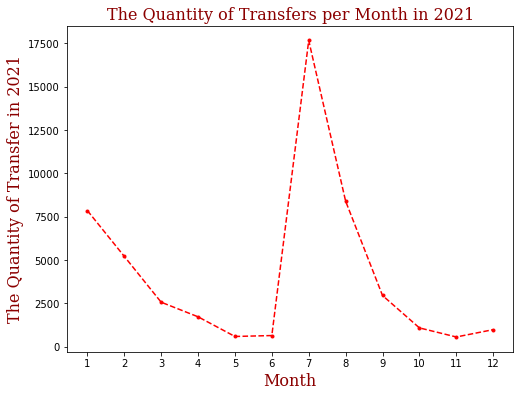

In [61]:
## change the font of label and title


plt.figure(figsize=(8,6))

plt.plot(CountingTransfersperMonth, 'r.--')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.title('The Quantity of Transfers per Month in 2021', fontdict=font)
plt.ylabel('The Quantity of Transfer in 2021', fontdict=font)

plt.xlabel('Month', fontdict=font)

plt.gca().set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])



plt.show()

## The classification of Players by age

<Figure size 576x288 with 0 Axes>

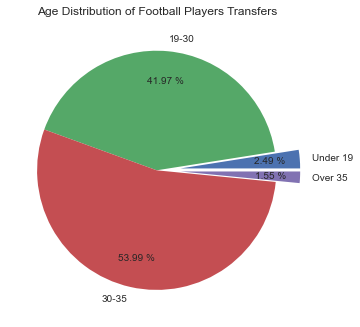

In [62]:
## ## make it bigger

plt.style.use('seaborn')
plt.figure(figsize=(8,4))

Teenager = df.loc[df['Age'] < 19].count()[0]
Youth = df.loc[(df['Age'] >= 19) & (df['Age'] < 30) ].count()[0]
Adults = df.loc[(df['Age'] >= 30) &  df['Age'] < 35 ].count()[0]
Senior = df.loc[df['Age'] >= 35].count()[0]


Age = [Teenager,Youth, Adults, Senior ]
labels = ['Under 19', '19-30', '30-35', 'Over 35' ]
explode = (0.2, 0, 0, 0.2)

fig1, ax1 = plt.subplots()

plt.pie(Age, labels=labels, autopct='%.2f %%', pctdistance=0.75, explode=explode)


plt.title('Age Distribution of Football Players Transfers')

plt.show()


### Dataframe was split into Player with fee transfer and without it to proceed with analysis

In [63]:
df_transfer_players = df.loc[df['Transfer Fee (€)']>0]
df_transfer_players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12


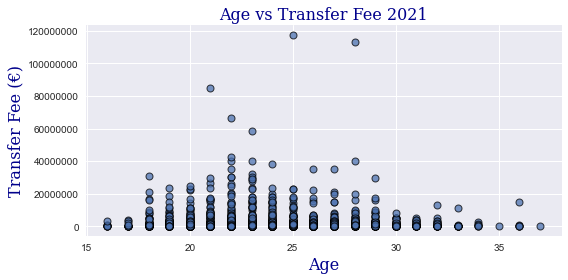

In [64]:
#make it bigger

Age = df_transfer_players['Age']
TransferFee = df_transfer_players['Transfer Fee (€)'] 

plt.style.use('seaborn')
plt.figure(figsize=(8,4))


font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }


plt.scatter(Age, TransferFee,edgecolor='black',linewidth=1, alpha=0.75)

plt.title('Age vs Transfer Fee 2021', fontdict=font)
plt.ylabel('Transfer Fee (€)', fontdict=font)
plt.xlabel('Age', fontdict=font)
plt.ticklabel_format(style='plain')

plt.tight_layout()

plt.show()


## Creating a graph Position by Transfer Fee

In [65]:
df_transfer_players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12


In [66]:
#df_transfer_players.reset_index(drop=True, inplace=True)

In [67]:
df_transfer_players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12


In [68]:
df_transfer_players.loc[df_transfer_players['Position'] == 'attack', 'Position'] = 'Attack'

In [69]:
results =  df_transfer_players.groupby('Position').sum()
results

,Age,Transfer Fee (€),Month
Position,,,
Attack,21,1550000,2
Attacking Midfield,3275,313097999,766
Central Midfield,4346,556894998,1115
Centre-Back,6403,886407000,1527
Centre-Forward,8035,963901999,1887
Defensive Midfield,2944,306312999,644
Goalkeeper,2087,189449000,497
Left Midfield,415,57972000,97
Left Winger,3685,667978000,913


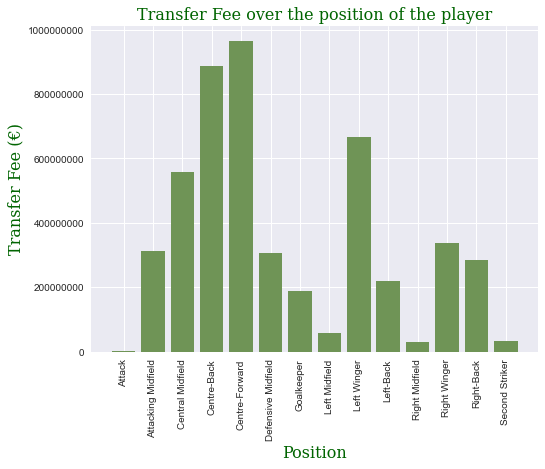

In [70]:

Position = [position for position, df in df_transfer_players.groupby('Position')]


plt.figure(figsize=(8,6))

plt.bar(Position, results['Transfer Fee (€)'], color='#6f9456')
plt.xticks(Position, rotation = 'vertical', size=10)


font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 16,
        }

plt.title('Transfer Fee over the position of the player', fontdict=font)
plt.ylabel('Transfer Fee (€)', fontdict=font)
plt.xlabel('Position',fontdict=font)


plt.ticklabel_format(style='plain', axis='y')

plt.show()

## The Best League on The World and Spendings

In [71]:
df_transfer_players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12


In [72]:
df_transfer_players['League Destination'].unique()

#Top 5 League: Bundesliga, Premier League, LaLiga, Serie A, Ligue 1

array(['Bundesliga', 'Premier League', 'Liga MX Clausura', 'MLS',
       'Super League', 'Super League 1', 'Stars League',
       'Primera División', 'Primera División Clausura', 'Ekstraklasa',
       'Liga Profesional', 'Allsvenskan', 'Liga 1 - Championship group',
       'Liga 1 Clausura', 'Premier Liga', 'Liga 1 - Relegation group',
       'Virsliga', 'Primera B', '2. Bundesliga', 'Protathlima Cyta',
       '1.Division', '1 Liga', 'División Profesional',
       'Superligaen Relegation round', 'efbet Liga',
       'Crystalbet Erovnuli Liga', 'U19 M-Liga', 'A Lyga', 'Ligue 1',
       '3. Liga', 'Fortuna Liga', 'Serie A', 'Liga Bwin',
       'Jupiler Pro League', '1B Pro League', 'LaLiga', 'League One',
       'Superligaen', 'Serie C - B', 'Série A', 'Süper Lig', 'Eredivisie',
       'K League 1', 'Premier League 2', 'FNL-2 Group 2', 'J1 League',
       'Vysheyshaya Liga', 'U16 Youth Football League',
       'Professional League', 'Primera Div. Clausura', 'UAE Pro League',
       '1.Li

In [73]:
## filtering data for these leagues then make calculations and graphs
#using largest and n smallest for each laegue
#each league, then for each position and players from each league!!

League = ["Bundesliga","Premier League","LaLiga","Serie A","Ligue 1"]
Country = ["Germany","England","Spain", "Italy", "France"]

Leagues = df_transfer_players['League Destination'].isin(League)
Countries = df_transfer_players['Country Destination'].isin(Country)

mask = Leagues & Countries

df_top5_leagues = df_transfer_players[mask]

df_top5_leagues

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Joe Scally,Right-Back,18,New York City,United States,MLS,Bor. M'gladbach,Germany,Bundesliga,1800000,2021-01-01,1
Frederik Alves,Centre-Back,21,Silkeborg IF,Denmark,1.Division,West Ham,England,Premier League,1600000,2021-01-01,1
Amad Diallo,Right Winger,18,Atalanta BC,Italy,Serie A,Man Utd,England,Premier League,21300000,2021-01-02,1
...,...,...,...,...,...,...,...,...,...,...,...
Jakub Kiwior,Centre-Back,21,MSK Zilina,Slovakia,Fortuna Liga,Spezia Calcio,Italy,Serie A,1500000,2021-08-31,8
Ridgeciano Haps,Left-Back,28,Feyenoord,Netherlands,Eredivisie,Venezia,Italy,Serie A,500000,2021-08-31,8
Nick Viergever,Centre-Back,32,PSV Eindhoven,Netherlands,Eredivisie,Greuther Fürth,Germany,Bundesliga,300000,2021-08-31,8


In [74]:
TOP5Leagues = df_top5_leagues.groupby(['League Destination']).sum()
TOP5Leagues['Transfer Fee (€)'].to_frame()

,Transfer Fee (€)
League Destination,
Bundesliga,462320000
LaLiga,302500000
Ligue 1,351100000
Premier League,1391070000
Serie A,651340000


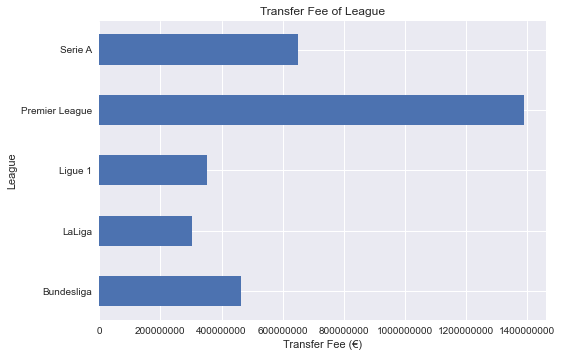

In [75]:
#modify it!
leagues = [leagues for leagues, df in TOP5Leagues.groupby('League Destination')]


plt.barh(leagues, TOP5Leagues['Transfer Fee (€)'], height=0.5)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Transfer Fee of League')
plt.ylabel('League')
plt.xlabel('Transfer Fee (€)')

plt.show()

In [76]:
#do more graphs from inspriation (last one)

In [77]:
#pd.set_option('display.max_rows', None)
#it was used to verify if all information we have

In [78]:
df_top5_leagues.groupby(['League Destination', 'Player','Team Destination','Position'])['Transfer Fee (€)'].agg([np.sum])


sum
League Destination Player            Team Destination Position                    
Bundesliga         Amine Adli        Bay. Leverkusen  Right Winger         7500000
                   André Silva       RB Leipzig       Centre-Forward      23000000
                   Angeliño          RB Leipzig       Left Midfield       18000000
                   Anton Stach       1.FSV Mainz 05   Defensive Midfield   3500000
                   Aster Vranckx     VfL Wolfsburg    Central Midfield     8000000
...                                                                            ...
Serie A            Vincenzo Fiorillo Salernitana      Goalkeeper            600000
                   Weston McKennie   Juventus         Central Midfield    20500000
                   Yacine Adli       AC Milan         Attacking Midfield   8000000
                   Youssef Maleh     Fiorentina       Central Midfield      700000
                   Zinho Vanheusden  Inter            Centre-Back         16000000

[347 rows x 1 columns]

In [79]:
df_top5_leagues.groupby(['League Destination', 'Position'])['Age'].agg([np.mean])

mean
League Destination Position                     
Bundesliga         Attacking Midfield  22.200000
                   Central Midfield    22.363636
                   Centre-Back         22.000000
                   Centre-Forward      21.888889
                   Defensive Midfield  23.500000
...                                          ...
Serie A            Left Winger         23.500000
                   Left-Back           22.571429
                   Right Midfield      29.500000
                   Right Winger        22.166667
                   Right-Back          24.100000

[57 rows x 1 columns]

In [80]:
df_top5_leagues.groupby(['League Destination', 'Position'])['Transfer Fee (€)'].agg([np.sum])



sum
League Destination Position                     
Bundesliga         Attacking Midfield   20070000
                   Central Midfield     73750000
                   Centre-Back         124650000
                   Centre-Forward       74750000
                   Defensive Midfield   12250000
...                                          ...
Serie A            Left Winger          42200000
                   Left-Back            27130000
                   Right Midfield       15000000
                   Right Winger         38100000
                   Right-Back           44550000

[57 rows x 1 columns]

In [81]:
df_top5_leagues.nlargest(25,'Transfer Fee (€)')

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Jack Grealish,Left Winger,25,Aston Villa,England,Premier League,Man City,England,Premier League,117500000,2021-08-05,8
Romelu Lukaku,Centre-Forward,28,Inter,Italy,Serie A,Chelsea,England,Premier League,113000000,2021-08-12,8
Jadon Sancho,Left Winger,21,Bor. Dortmund,Germany,Bundesliga,Man Utd,England,Premier League,85000000,2021-07-23,7
Achraf Hakimi,Right-Back,22,Inter,Italy,Serie A,Paris SG,France,Ligue 1,66500000,2021-07-06,7
Ben White,Centre-Back,23,Brighton,England,Premier League,Arsenal,England,Premier League,58500000,2021-07-30,7
Dayot Upamecano,Centre-Back,22,RB Leipzig,Germany,Bundesliga,FC Bayern,Germany,Bundesliga,42500000,2021-07-05,7
Ibrahima Konaté,Centre-Back,22,RB Leipzig,Germany,Bundesliga,Liverpool,England,Premier League,40000000,2021-07-01,7
Raphaël Varane,Centre-Back,28,Real Madrid,Spain,LaLiga,Man Utd,England,Premier League,40000000,2021-08-14,8
Tammy Abraham,Centre-Forward,23,Chelsea,England,Premier League,AS Roma,Italy,Serie A,40000000,2021-08-17,8


In [82]:
df_top5_leagues.nsmallest(25,'Transfer Fee (€)')

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Diant Ramaj,Goalkeeper,19,1.FC Heidenheim,Germany,2. Bundesliga,E. Frankfurt,Germany,Bundesliga,100000,2021-07-01,7
Robert Snodgrass,Right Winger,33,West Ham,England,Premier League,West Brom,England,Premier League,110000,2021-01-08,1
Reda Boultam,Attacking Midfield,23,Triestina,Italy,Serie C - A,Salernitana,Italy,Serie A,200000,2021-07-01,7
Daniel Klein,Goalkeeper,20,Hoffenheim II,Germany,Regionalliga Südwest,FC Augsburg,Germany,Bundesliga,200000,2021-07-02,7
Luka Romero,Attacking Midfield,16,RCD Mallorca B,Spain,Spain,Lazio,Italy,Serie A,200000,2021-07-20,7
David Schnegg,Left-Back,22,LASK,Austria,Bundesliga,Venezia,Italy,Serie A,250000,2021-07-01,7
Jens Grahl,Goalkeeper,32,VfB Stuttgart,Germany,Bundesliga,E. Frankfurt,Germany,Bundesliga,250000,2021-07-19,7
Pietro Cianci,Centre-Forward,25,Teramo,Italy,Serie C - B,Sassuolo,Italy,Serie A,250000,2021-08-12,8
Sebastian Griesbeck,Defensive Midfield,30,Union Berlin,Germany,Bundesliga,Greuther Fürth,Germany,Bundesliga,250000,2021-08-31,8


In [83]:
#using where and query for select players, pivot as well!!

In [84]:
a = df_top5_leagues.groupby(['League Destination'])

In [85]:
a.get_group('Bundesliga').nlargest(10,'Transfer Fee (€)')

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dayot Upamecano,Centre-Back,22,RB Leipzig,Germany,Bundesliga,FC Bayern,Germany,Bundesliga,42500000,2021-07-05,7
Donyell Malen,Centre-Forward,22,PSV Eindhoven,Netherlands,Eredivisie,Bor. Dortmund,Germany,Bundesliga,30000000,2021-07-27,7
André Silva,Centre-Forward,25,E. Frankfurt,Germany,Bundesliga,RB Leipzig,Germany,Bundesliga,23000000,2021-07-02,7
Odilon Kossounou,Centre-Back,20,Club Brugge,Belgium,Jupiler Pro League,Bay. Leverkusen,Germany,Bundesliga,23000000,2021-07-22,7
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Josko Gvardiol,Centre-Back,19,Dinamo Zagreb,Croatia,1.HNL,RB Leipzig,Germany,Bundesliga,18800000,2021-07-01,7
Angeliño,Left Midfield,24,Man City,England,Premier League,RB Leipzig,Germany,Bundesliga,18000000,2021-07-01,7
Ilaix Moriba,Central Midfield,18,Barcelona B,Spain,Primera Div. R.F.E.F. - Gr. II,RB Leipzig,Germany,Bundesliga,16000000,2021-08-31,8
Benjamin Henrichs,Right-Back,24,Monaco,Monaco,Ligue 1,RB Leipzig,Germany,Bundesliga,15000000,2021-07-01,7


In [86]:
a.get_group('Bundesliga').nsmallest(10,'Transfer Fee (€)')

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Diant Ramaj,Goalkeeper,19,1.FC Heidenheim,Germany,2. Bundesliga,E. Frankfurt,Germany,Bundesliga,100000,2021-07-01,7
Daniel Klein,Goalkeeper,20,Hoffenheim II,Germany,Regionalliga Südwest,FC Augsburg,Germany,Bundesliga,200000,2021-07-02,7
Jens Grahl,Goalkeeper,32,VfB Stuttgart,Germany,Bundesliga,E. Frankfurt,Germany,Bundesliga,250000,2021-07-19,7
Sebastian Griesbeck,Defensive Midfield,30,Union Berlin,Germany,Bundesliga,Greuther Fürth,Germany,Bundesliga,250000,2021-08-31,8
Stefanos Kapino,Goalkeeper,27,Werder Bremen,Germany,2. Bundesliga,Arm. Bielefeld,Germany,Bundesliga,300000,2021-08-12,8
Nick Viergever,Centre-Back,32,PSV Eindhoven,Netherlands,Eredivisie,Greuther Fürth,Germany,Bundesliga,300000,2021-08-31,8
Julius Kade,Central Midfield,22,Dynamo Dresden,Germany,2. Bundesliga,Union Berlin,Germany,Bundesliga,500000,2021-07-01,7
Rick van Drongelen,Centre-Back,22,Hamburger SV,Germany,2. Bundesliga,Union Berlin,Germany,Bundesliga,500000,2021-07-01,7
Ishak Belfodil,Centre-Forward,29,TSG Hoffenheim,Germany,Bundesliga,Hertha BSC,Germany,Bundesliga,500000,2021-08-23,8


In [87]:
df_loan_players = df.loc[df['Transfer Fee (€)'] == 0]
df_loan_players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Artem Milevskyi,Centre-Forward,35,Dynamo Brest,Belarus,Vysheyshaya Liga,FK Minaj,Ukraine,Premier Liga,0,2021-01-01,1
Gino Parson,Attacking Midfield,41,Stadtallendorf,Germany,Regionalliga Südwest,FC Gießen,Germany,Regionalliga Südwest,0,2021-01-01,1
Behrang Safari,Left-Back,35,Malmö FF,Sweden,Allsvenskan,Lunds SK,Sweden,Sweden,0,2021-01-01,1
Ariel Cólzera,Second Striker,34,CA Temperley,Argentina,Primera Nacional,Deportivo Merlo,Argentina,Argentina,0,2021-01-01,1
Robbie Weir,Central Midfield,32,Waterford FC,Ireland,Premier Division,Crusaders,Northern Ireland,Premiership,0,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31,12
Emiliano Tortolano,Right Winger,31,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31,12
Dylan Kambo,Central Midfield,26,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31,12


In [724]:
#browse my notes if I do all steps which should be done!
#dealing with this red box after command!!!!!!
#reading stackoverflow problem and study it!!!
#Group league and country (how much money league earn and spend in terms of clubs) which club earns most and which spends 
#and how much money they earn visualise it bar chart
#top 10 players and graph these
# group players in therms of age and gorup these by position and which posion costs most. COREY SCHAFER!@
# (the highest one which earn and spend?? and 
# apply conditional categories if = 0 then it is a loan. 
# filter recorda basedon age young and the same with salary make these groups, ;
#show from which position they are oldest and youngest ones 
# which league ears most
# make a graph with transfer fee and months by position (legend) x = month y transfer fee
## https://sites.duke.edu/transfermarket/data/premier-league/ <-- take inspirations
# total spendings
## total spending per club from the best clubs on the world
## google -> age transfer fee (inspirations)
#take inspriation from
#https://www.researchgate.net/publication/342347848_Analyzing_soccer's_transfers_and_predicting_footballers'_transfer_price
#look for more inspiration regarding this thema  from internet
#using groupby, agg (min max sum etc)m get group etc read about it and implement
#using query and where!!